In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
lead = pd.read_csv('leads.csv')
lead.T

,0,1,2,3,4,5,6,7,8,9,...,9230,9231,9232,9233,9234,9235,9236,9237,9238,9239
Prospect ID,7927b2df-8bba-4d29-b9a2-b6e0beafe620,2a272436-5132-4136-86fa-dcc88c88f482,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,3256f628-e534-4826-9d63-4a8b88782852,2058ef08-2858-443e-a01f-a9237db2f5ce,9fae7df4-169d-489b-afe4-0f3d752542ed,20ef72a2-fb3b-45e0-924e-551c5fa59095,cfa0128c-a0da-4656-9d47-0aa4e67bf690,af465dfc-7204-4130-9e05-33231863c4b5,...,d11c15b7-8056-45a6-8954-771c0d0495fe,4aeae36b-2b57-494f-bdab-dd58844286b4,2d0109e9-dfb2-4664-83de-c2ea75ec7516,3f715465-2546-47cd-afa8-8b8dc63b8b43,c0b25922-511f-4c56-852e-ced210a45447,19d6451e-fcd6-407c-b83b-48e1af805ea9,82a7005b-7196-4d56-95ce-a79f937a158d,aac550fe-a586-452d-8d3c-f1b62c94e02c,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
Lead Number,660737,660728,660727,660719,660681,660680,660673,660664,660624,660616,...,579701,579697,579642,579622,579615,579564,579546,579545,579538,579533
Lead Origin,API,API,Landing Page Submission,Landing Page Submission,Landing Page Submission,API,Landing Page Submission,API,Landing Page Submission,API,...,Landing Page Submission,Landing Page Submission,Landing Page Submission,API,Landing Page Submission,Landing Page Submission,Landing Page Submission,Landing Page Submission,Landing Page Submission,Landing Page Submission
Lead Source,Olark Chat,Organic Search,Direct Traffic,Direct Traffic,Google,Olark Chat,Google,Olark Chat,Direct Traffic,Google,...,Google,Google,Direct Traffic,Direct Traffic,Direct Traffic,Direct Traffic,Direct Traffic,Direct Traffic,Google,Direct Traffic
Do Not Email,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,Yes,No,Yes,No,No
Do Not Call,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
Converted,0,0,1,0,1,0,1,0,0,0,...,0,1,0,1,1,1,0,0,1,1
TotalVisits,0.0,5.0,2.0,1.0,2.0,0.0,2.0,0.0,2.0,4.0,...,2.0,8.0,2.0,13.0,5.0,8.0,2.0,2.0,3.0,6.0
Total Time Spent on Website,0,674,1532,305,1428,0,1640,0,71,58,...,870,1016,1770,1409,210,1845,238,199,499,1279
Page Views Per Visit,0.0,2.5,2.0,1.0,1.0,0.0,2.0,0.0,2.0,4.0,...,2.0,4.0,2.0,2.6,2.5,2.67,2.0,2.0,3.0,3.0


## Exploratory Data Analysis(EDA)

In [3]:
lead.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [4]:
lead.columns = lead.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(lead.dtypes[lead.dtypes == 'object'].index)


for c in categorical_columns:
    lead[c] = lead[c].str.lower().str.replace(' ', '_')
    lead[c] = lead[c].replace(to_replace=np.NaN, value='unk')
    

In [5]:
lead.describe().round()

,lead_number,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,asymmetrique_activity_score,asymmetrique_profile_score
count,9240.0,9240.0,9103.0,9240.0,9103.0,5022.0,5022.0
mean,617188.0,0.0,3.0,488.0,2.0,14.0,16.0
std,23406.0,0.0,5.0,548.0,2.0,1.0,2.0
min,579533.0,0.0,0.0,0.0,0.0,7.0,11.0
25%,596484.0,0.0,1.0,12.0,1.0,14.0,15.0
50%,615479.0,0.0,3.0,248.0,2.0,14.0,16.0
75%,637387.0,1.0,5.0,936.0,3.0,15.0,18.0
max,660737.0,1.0,251.0,2272.0,55.0,18.0,20.0


In [6]:
#for c in ['asymmetrique_profile_score', 'asymmetrique_activity_score']:
    #lead[c] = lead[c].replace(to_replace="16", value=np.nan)

In [7]:
lead.isnull().sum()

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                         0
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                       0
country                                             0
specialization                                      0
how_did_you_hear_about_x_education                  0
what_is_your_current_occupation                     0
what_matters_most_to_you_in_choosing_a_course       0
search                                              0
magazine                                            0
newspaper_article           

In [8]:
lead

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,...,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark_chat,no,no,0,0.0,0,0.00,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic_search,no,no,0,5.0,674,2.50,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email_opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.00,...,no,potential_lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email_opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.00,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing_page_submission,google,no,no,1,2.0,1428,1.00,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,landing_page_submission,direct_traffic,yes,no,1,8.0,1845,2.67,...,no,potential_lead,mumbai,02.medium,01.high,15.0,17.0,no,no,email_marked_spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,landing_page_submission,direct_traffic,no,no,0,2.0,238,2.00,...,no,potential_lead,mumbai,02.medium,01.high,14.0,19.0,no,yes,sms_sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,landing_page_submission,direct_traffic,yes,no,0,2.0,199,2.00,...,no,potential_lead,mumbai,02.medium,01.high,13.0,20.0,no,yes,sms_sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,landing_page_submission,google,no,no,1,3.0,499,3.00,...,no,unk,other_metro_cities,02.medium,02.medium,15.0,16.0,no,no,sms_sent


In [9]:
tts = pd.to_numeric(lead.total_time_spent_on_website, errors='coerce')

In [10]:
lead.total_time_spent_on_website = pd.to_numeric(lead.total_time_spent_on_website, errors='coerce')

In [11]:
tts.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9235    False
9236    False
9237    False
9238    False
9239    False
Name: total_time_spent_on_website, Length: 9240, dtype: bool

all false shown their is no single row with nan. we can always check in following cell.

In [12]:
lead[tts.isnull()][['prospect_id', 'total_time_spent_on_website']]

,prospect_id,total_time_spent_on_website


In [13]:
lead.converted.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [14]:
lead.converted = (lead.converted == 1).astype(int)
lead.converted

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: converted, Length: 9240, dtype: int32

In [15]:
for c in ['asymmetrique_profile_score', 'asymmetrique_activity_score']:
        lead[c] = lead[c].replace(to_replace=np.nan, value=16)
for c in ['page_views_per_visit', 'totalvisits']:
        lead[c] = lead[c].replace(to_replace=np.nan, value=3)

## SETTING UP VALDATION FRAMEWORK

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_full_train, df_test = train_test_split(lead, test_size=0.2, random_state=1)

The above code train_test_split split the dataset into two. So, we will need to split it again.

In [18]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [19]:
len(df_train), len(df_val), len(df_test)

(5544, 1848, 1848)

In [20]:
y_train = df_train.reset_index(drop=True)
y_val = df_val.reset_index(drop=True)
y_test = df_test.reset_index(drop=True)

In [21]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [22]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

In [23]:
df_full_train = df_full_train.reset_index(drop=True)

In [24]:
df_full_train.converted.value_counts(normalize=True)

0    0.616883
1    0.383117
Name: converted, dtype: float64

In [25]:
global_converted_rate = df_full_train.converted.mean()
round(global_converted_rate, 3)

0.383

In [26]:
lead.dtypes[lead.dtypes == "object"]

prospect_id                                      object
lead_origin                                      object
lead_source                                      object
do_not_email                                     object
do_not_call                                      object
last_activity                                    object
country                                          object
specialization                                   object
how_did_you_hear_about_x_education               object
what_is_your_current_occupation                  object
what_matters_most_to_you_in_choosing_a_course    object
search                                           object
magazine                                         object
newspaper_article                                object
x_education_forums                               object
newspaper                                        object
digital_advertisement                            object
through_recommendations                         

In [27]:
numerical = ['totalvisits', 'total_time_spent_on_website', 'page_views_per_visit', 
             'asymmetrique_activity_score', 'asymmetrique_profile_score']
categorical = [ 'lead_origin', 'lead_source', 'do_not_email','do_not_call',                                      
               'last_activity', 'country', 'specialization', 'how_did_you_hear_about_x_education', 
               'what_is_your_current_occupation',                  
               'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine', 'newspaper_article', 
               'x_education_forums',                               
               'newspaper', 'digital_advertisement', 'through_recommendations', 'receive_more_updates_about_our_courses', 
               'tags',                                             
               'lead_quality', 'update_me_on_supply_chain_content', 'get_updates_on_dm_content', 'lead_profile', 
               'city', 'asymmetrique_activity_index', 'asymmetrique_profile_index', 
               'i_agree_to_pay_the_amount_through_cheque', 'a_free_copy_of_mastering_the_interview', 
               'last_notable_activity']


In [28]:
df_full_train[categorical].nunique()

lead_origin                                       5
lead_source                                      20
do_not_email                                      2
do_not_call                                       2
last_activity                                    17
country                                          37
specialization                                   20
how_did_you_hear_about_x_education               11
what_is_your_current_occupation                   7
what_matters_most_to_you_in_choosing_a_course     3
search                                            2
magazine                                          1
newspaper_article                                 2
x_education_forums                                1
newspaper                                         2
digital_advertisement                             2
through_recommendations                           2
receive_more_updates_about_our_courses            1
tags                                             27
lead_quality

## Feature engineering

looking at the lead rate within the group

In [29]:
df_full_train

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,...,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,e00e7924-260f-4ad7-8ad5-a246813affc0,609012,landing_page_submission,google,no,no,0,4.0,239,4.0,...,no,select,mumbai,unk,unk,16.0,16.0,no,no,email_opened
1,db7df067-c985-4d24-80af-c72990c68904,634813,lead_add_form,reference,no,no,1,0.0,0,0.0,...,no,potential_lead,thane_&_outskirts,02.medium,01.high,15.0,19.0,no,no,sms_sent
2,1ab4347a-252d-4d68-b178-6a924cc08c19,627932,landing_page_submission,direct_traffic,no,no,0,2.0,271,2.0,...,no,unk,other_cities_of_maharashtra,unk,unk,16.0,16.0,no,yes,email_opened
3,930ff3a2-aa35-4a4d-9f27-04423d302af4,650147,api,referral_sites,no,no,0,8.0,51,4.0,...,no,select,select,02.medium,02.medium,15.0,13.0,no,no,modified
4,6b142314-ab04-4b05-9a57-90105cb2b91a,600800,landing_page_submission,direct_traffic,no,no,0,1.0,95,1.0,...,no,unk,mumbai,unk,unk,16.0,16.0,no,yes,modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7387,4669c092-0616-46e5-a4c6-c57059da0ad6,631869,landing_page_submission,organic_search,no,no,0,4.0,502,4.0,...,no,select,mumbai,unk,unk,16.0,16.0,no,yes,email_opened
7388,8dafc7c8-2e0e-4bac-b9f2-3a773b5a531f,589866,landing_page_submission,google,no,no,0,3.0,260,3.0,...,no,select,thane_&_outskirts,03.low,01.high,9.0,17.0,no,no,modified
7389,0a80f999-708f-4abb-8508-591f6ef2829d,650770,api,google,no,no,0,2.0,271,1.0,...,no,other_leads,select,02.medium,02.medium,14.0,14.0,no,no,email_opened
7390,53690d88-52f0-4ce5-b6b8-a13570a6db35,610095,api,google,no,no,0,2.0,444,2.0,...,no,other_leads,select,unk,unk,16.0,16.0,no,no,modified


In [30]:
high_mean = df_full_train[df_full_train.asymmetrique_profile_index == '01.high'].converted.mean()
print('asymmetrique_profile_index == 01.high:', round(high_mean, 3))

medium_mean = df_full_train[df_full_train.asymmetrique_profile_index == '02.medium'].converted.mean()
print('asymmetrique_profile_index == 02.medium:  ', round(medium_mean, 3))

asymmetrique_profile_index == 01.high: 0.483
asymmetrique_profile_index == 02.medium:   0.304


In [31]:
no_email_access_mean = df_full_train[df_full_train.do_not_email == 'yes'].converted.mean()
print('do_not_email == yes:', round(no_email_access_mean, 3))

email_access_mean = df_full_train[df_full_train.do_not_email == 'no'].converted.mean()
print('do_not_email == no:  ', round(email_access_mean, 3))

do_not_email == yes: 0.174
do_not_email == no:   0.401


converted rate = global mean - group

In [32]:
global_converted_rate - no_email_access_mean

0.2088360032522469

Risk Ratio 

(group / global) mean they are literally the same but different method

In [33]:
 no_email_access_mean / global_converted_rate

0.45490263557888094

In [34]:
 email_access_mean / global_converted_rate

1.0473684079360215

In [35]:
df_group = df_full_train.groupby(by='asymmetrique_profile_index').converted.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_converted_rate
df_group['risk'] = df_group['mean'] / global_converted_rate
df_group

,mean,diff,risk
asymmetrique_profile_index,,,
01.high,0.482525,0.099408,1.259473
02.medium,0.304191,-0.078926,0.793990
03.low,0.416667,0.033550,1.087571
unk,0.382519,-0.000598,0.998438


In [36]:
for col in categorical:
    print(col)
    df_group = df_full_train.groupby(by=col).converted.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_converted_rate
    df_group['risk'] = df_group['mean'] / global_converted_rate
    display(df_group)
    print()
    print()

lead_origin


,mean,diff,risk
lead_origin,,,
api,0.308414,-0.074702,0.805014
landing_page_submission,0.360677,-0.022440,0.941427
lead_add_form,0.919861,0.536744,2.400992
lead_import,0.225000,-0.158117,0.587288
quick_add_form,1.000000,0.616883,2.610169




lead_source


,mean,diff,risk
lead_source,,,
bing,0.166667,-0.216450,0.435028
blog,0.000000,-0.383117,0.000000
click2call,0.750000,0.366883,1.957627
direct_traffic,0.317624,-0.065493,0.829052
facebook,0.225000,-0.158117,0.587288
google,0.400000,0.016883,1.044068
live_chat,1.000000,0.616883,2.610169
nc_edm,1.000000,0.616883,2.610169
olark_chat,0.251768,-0.131349,0.657157




do_not_email


,mean,diff,risk
do_not_email,,,
no,0.401265,0.018148,1.047368
yes,0.174281,-0.208836,0.454903




do_not_call


,mean,diff,risk
do_not_call,,,
no,0.383033,-0.000083,0.999782
yes,1.000000,0.616883,2.610169




last_activity


,mean,diff,risk
last_activity,,,
approached_upfront,1.000000,0.616883,2.610169
converted_to_lead,0.126437,-0.256680,0.330021
email_bounced,0.092308,-0.290809,0.240939
email_link_clicked,0.239437,-0.143680,0.624970
email_marked_spam,1.000000,0.616883,2.610169
email_opened,0.363137,-0.019980,0.947848
email_received,1.000000,0.616883,2.610169
form_submitted_on_website,0.255102,-0.128015,0.665860
had_a_phone_conversation,0.727273,0.344156,1.898305




country


,mean,diff,risk
country,,,
asia/pacific_region,0.500000,0.116883,1.305085
australia,0.222222,-0.160895,0.580038
bahrain,0.666667,0.283550,1.740113
bangladesh,0.500000,0.116883,1.305085
belgium,0.000000,-0.383117,0.000000
canada,0.000000,-0.383117,0.000000
china,0.000000,-0.383117,0.000000
denmark,1.000000,0.616883,2.610169
france,0.600000,0.216883,1.566102




specialization


,mean,diff,risk
specialization,,,
"banking,_investment_and_insurance",0.458333,0.075216,1.196328
business_administration,0.457478,0.074361,1.194095
e-business,0.408163,0.025046,1.065375
e-commerce,0.356322,-0.026795,0.930060
finance_management,0.453865,0.070748,1.184665
healthcare_management,0.504065,0.120948,1.315695
hospitality_management,0.363636,-0.019481,0.949153
human_resource_management,0.455474,0.072358,1.188866
international_business,0.361702,-0.021415,0.944104




how_did_you_hear_about_x_education


,mean,diff,risk
how_did_you_hear_about_x_education,,,
advertisements,0.450980,0.067864,1.177135
email,0.421053,0.037936,1.099019
multiple_sources,0.349593,-0.033523,0.912498
online_search,0.425868,0.042751,1.111586
other,0.412903,0.029786,1.077747
select,0.474021,0.090904,1.237276
sms,0.200000,-0.183117,0.522034
social_media,0.428571,0.045455,1.118644
student_of_someschool,0.475410,0.092293,1.240900




what_is_your_current_occupation


,mean,diff,risk
what_is_your_current_occupation,,,
businessman,0.500000,0.116883,1.305085
housewife,1.000000,0.616883,2.610169
other,0.615385,0.232268,1.606258
student,0.359281,-0.023835,0.937785
unemployed,0.429491,0.046375,1.121045
unk,0.143326,-0.239791,0.374104
working_professional,0.916071,0.532955,2.391102




what_matters_most_to_you_in_choosing_a_course


,mean,diff,risk
what_matters_most_to_you_in_choosing_a_course,,,
better_career_prospects,0.482146,0.099029,1.258483
flexibility_&_convenience,0.500000,0.116883,1.305085
unk,0.142127,-0.240990,0.370976




search


,mean,diff,risk
search,,,
no,0.383146,0.000029,1.000076
yes,0.363636,-0.019481,0.949153




magazine


,mean,diff,risk
magazine,,,
no,0.383117,0.0,1.0




newspaper_article


,mean,diff,risk
newspaper_article,,,
no,0.383033,-0.000083,0.999782
yes,1.000000,0.616883,2.610169




x_education_forums


,mean,diff,risk
x_education_forums,,,
no,0.383117,0.0,1.0




newspaper


,mean,diff,risk
newspaper,,,
no,0.383169,0.000052,1.000135
yes,0.000000,-0.383117,0.000000




digital_advertisement


,mean,diff,risk
digital_advertisement,,,
no,0.383221,0.000104,1.000271
yes,0.000000,-0.383117,0.000000




through_recommendations


,mean,diff,risk
through_recommendations,,,
no,0.382918,-0.000199,0.999482
yes,0.750000,0.366883,1.957627




receive_more_updates_about_our_courses


,mean,diff,risk
receive_more_updates_about_our_courses,,,
no,0.383117,0.0,1.0




tags


,mean,diff,risk
tags,,,
already_a_student,0.007752,-0.375365,0.020234
busy,0.567742,0.184625,1.481903
closed_by_horizzon,0.996454,0.613337,2.600914
diploma_holder_(not_eligible),0.020833,-0.362284,0.054379
graduation_in_progress,0.063830,-0.319287,0.166607
in_confusion_whether_part_time_or_dlp,0.250000,-0.133117,0.652542
in_touch_with_eins,0.272727,-0.110390,0.711864
interested__in_full_time_mba,0.010989,-0.372128,0.028683
interested_in_next_batch,1.000000,0.616883,2.610169




lead_quality


,mean,diff,risk
lead_quality,,,
high_in_relevance,0.948718,0.565601,2.476315
low_in_relevance,0.803063,0.419947,2.096132
might_be,0.753392,0.370275,1.966480
not_sure,0.242597,-0.140520,0.633219
unk,0.214605,-0.168512,0.560155
worst,0.020408,-0.362709,0.053269




update_me_on_supply_chain_content


,mean,diff,risk
update_me_on_supply_chain_content,,,
no,0.383117,0.0,1.0




get_updates_on_dm_content


,mean,diff,risk
get_updates_on_dm_content,,,
no,0.383117,0.0,1.0




lead_profile


,mean,diff,risk
lead_profile,,,
dual_specialization_student,1.000000,0.616883,2.610169
lateral_student,0.952381,0.569264,2.485876
other_leads,0.351621,-0.031496,0.917790
potential_lead,0.781591,0.398474,2.040086
select,0.404403,0.021286,1.055560
student_of_someschool,0.024752,-0.358364,0.064608
unk,0.142127,-0.240990,0.370976




city


,mean,diff,risk
city,,,
mumbai,0.401318,0.018201,1.047509
other_cities,0.408015,0.024898,1.064987
other_cities_of_maharashtra,0.437326,0.054209,1.141495
other_metro_cities,0.401961,0.018844,1.049186
select,0.485479,0.102363,1.267184
thane_&_outskirts,0.447412,0.064295,1.167822
tier_ii_cities,0.339286,-0.043831,0.885593
unk,0.107239,-0.275878,0.279911




asymmetrique_activity_index


,mean,diff,risk
asymmetrique_activity_index,,,
01.high,0.313522,-0.069595,0.818344
02.medium,0.428008,0.044891,1.117173
03.low,0.092715,-0.290402,0.242002
unk,0.382519,-0.000598,0.998438




asymmetrique_profile_index


,mean,diff,risk
asymmetrique_profile_index,,,
01.high,0.482525,0.099408,1.259473
02.medium,0.304191,-0.078926,0.793990
03.low,0.416667,0.033550,1.087571
unk,0.382519,-0.000598,0.998438




i_agree_to_pay_the_amount_through_cheque


,mean,diff,risk
i_agree_to_pay_the_amount_through_cheque,,,
no,0.383117,0.0,1.0




a_free_copy_of_mastering_the_interview


,mean,diff,risk
a_free_copy_of_mastering_the_interview,,,
no,0.39578,0.012663,1.033053
yes,0.35545,-0.027667,0.927785




last_notable_activity


,mean,diff,risk
last_notable_activity,,,
approached_upfront,1.000000,0.616883,2.610169
email_bounced,0.160000,-0.223117,0.417627
email_link_clicked,0.222222,-0.160895,0.580038
email_marked_spam,1.000000,0.616883,2.610169
email_opened,0.364362,-0.018755,0.951046
email_received,1.000000,0.616883,2.610169
form_submitted_on_website,0.000000,-0.383117,0.000000
had_a_phone_conversation,0.900000,0.516883,2.349153
modified,0.230430,-0.152687,0.601461


# Mutual Information
it the order of how important feature is to the target variables

In [37]:
from sklearn.metrics import mutual_info_score

In [38]:
mutual_info_score(df_full_train.converted, df_full_train.do_not_call)

0.00012980574800136916

In [39]:
mutual_info_score(df_full_train.converted, df_full_train.asymmetrique_profile_index)

0.008982885395027132

In [40]:
mutual_info_score(df_full_train.converted, df_full_train.do_not_email)

0.008910986005496974

In [41]:
def mutual_info_converted_score(series):
    return mutual_info_score(series, df_full_train.converted)

In [42]:
mi = df_full_train[categorical].apply(mutual_info_converted_score)
mi.sort_values(ascending=True)

update_me_on_supply_chain_content                7.771561e-16
i_agree_to_pay_the_amount_through_cheque         7.771561e-16
receive_more_updates_about_our_courses           7.771561e-16
x_education_forums                               7.771561e-16
magazine                                         7.771561e-16
get_updates_on_dm_content                        7.771561e-16
search                                           1.204580e-06
newspaper                                        6.535683e-05
newspaper_article                                1.298057e-04
do_not_call                                      1.298057e-04
digital_advertisement                            1.307250e-04
through_recommendations                          1.505137e-04
a_free_copy_of_mastering_the_interview           7.452385e-04
country                                          4.992103e-03
do_not_email                                     8.910986e-03
asymmetrique_profile_index                       8.982885e-03
asymmetr

# feature correlation

In [43]:
df_full_train.totalvisits.max()

251.0

In [44]:
df_full_train[numerical].corrwith(df_full_train.converted)

totalvisits                    0.032361
total_time_spent_on_website    0.363470
page_views_per_visit           0.004602
asymmetrique_activity_score    0.094017
asymmetrique_profile_score     0.164407
dtype: float64

very high correlation

# One-Hot encoding

In [45]:
from sklearn.feature_extraction import DictVectorizer

In [46]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)


In [47]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [48]:
z = np.linspace(-7, 7, 51)

In [49]:
sigmoid(100000)

1.0

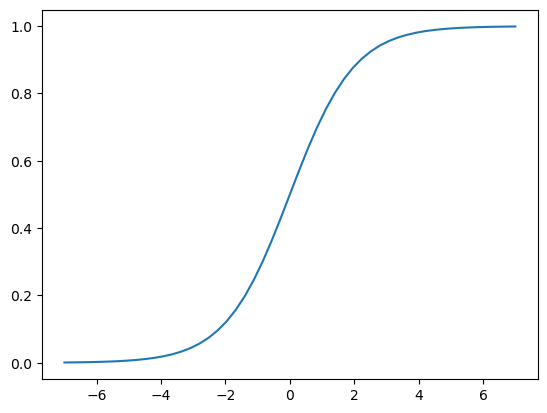

In [50]:
plt.plot(z, sigmoid(z))

# Logistic Regression
* Binary Classification
* Linear vs Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [53]:
model.intercept_[0]

-0.6991823858456152

In [54]:
model.coef_[0].round(3)

array([-4.300e-01, -2.690e-01, -1.002e+00,  2.210e-01,  8.690e-01,
       -7.860e-01,  8.780e-01,  4.610e-01, -2.920e-01, -8.100e-02,
       -7.860e-01, -2.410e-01, -2.310e-01, -4.180e-01, -3.260e-01,
       -3.400e-01, -1.000e-03, -4.100e-01,  7.580e-01,  2.680e-01,
        5.400e-02, -1.040e-01,  1.900e-02, -2.060e-01, -1.180e-01,
       -2.800e-01, -5.600e-02,  3.000e-03,  1.800e-02,  6.140e-01,
       -3.500e-02,  6.270e-01, -4.620e-01, -4.900e-02, -2.670e-01,
       -2.000e-03, -1.280e-01, -6.000e-03, -1.480e-01, -1.300e-02,
        3.080e-01, -0.000e+00, -7.260e-01, -2.390e-01, -5.960e-01,
       -2.940e-01,  4.510e-01, -6.000e-03, -4.000e-03, -9.100e-02,
       -0.000e+00,  2.440e-01,  1.940e-01,  2.980e-01,  3.020e-01,
       -3.830e-01, -3.160e-01, -7.510e-01,  5.200e-02,  1.120e-01,
       -8.110e-01, -6.990e-01,  1.770e-01,  6.600e-02, -6.340e-01,
       -1.170e-01,  2.500e-02, -7.090e-01, -3.400e-02,  2.480e-01,
        3.590e-01, -2.730e-01,  1.920e-01, -6.990e-01,  1.510e

In [55]:
y_pred = model.predict_proba(X_val)[:, 1]

In [56]:
lead_decision = (y_pred >= 0.5)
lead_decision

array([False,  True, False, ..., False, False,  True])

In [57]:
y_val

array([0, 1, 0, ..., 1, 0, 1])

In [58]:
(lead_decision == y_val).mean()

0.9415584415584416

In [59]:
lead_pred = pd.DataFrame()
lead_pred['probability'] = y_pred
lead_pred['prediction'] = lead_decision.astype(int)
lead_pred['actual'] = y_val

In [60]:
lead_pred['correct'] = lead_pred.prediction == lead_pred.actual

In [61]:
lead_pred.correct.mean()

0.9415584415584416

In [62]:
lead_decision.astype(int)

array([0, 1, 0, ..., 0, 0, 1])

# Model Interpretation

In [63]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'a_free_copy_of_mastering_the_interview=no': -0.43,
 'a_free_copy_of_mastering_the_interview=yes': -0.269,
 'asymmetrique_activity_index=01.high': -1.002,
 'asymmetrique_activity_index=02.medium': 0.221,
 'asymmetrique_activity_index=03.low': 0.869,
 'asymmetrique_activity_index=unk': -0.786,
 'asymmetrique_activity_score': 0.878,
 'asymmetrique_profile_index=01.high': 0.461,
 'asymmetrique_profile_index=02.medium': -0.292,
 'asymmetrique_profile_index=03.low': -0.081,
 'asymmetrique_profile_index=unk': -0.786,
 'asymmetrique_profile_score': -0.241,
 'city=mumbai': -0.231,
 'city=other_cities': -0.418,
 'city=other_cities_of_maharashtra': -0.326,
 'city=other_metro_cities': -0.34,
 'city=select': -0.001,
 'city=thane_&_outskirts': -0.41,
 'city=tier_ii_cities': 0.758,
 'city=unk': 0.268,
 'country=asia/pacific_region': 0.054,
 'country=australia': -0.104,
 'country=bahrain': 0.019,
 'country=bangladesh': -0.206,
 'country=belgium': -0.118,
 'country=canada': -0.28,
 'country=china': -

In [64]:
small = ['asymmetrique_activity_score', 'total_time_spent_on_website', 'asymmetrique_profile_score']

In [65]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'asymmetrique_activity_score': 16.0,
  'total_time_spent_on_website': 304,
  'asymmetrique_profile_score': 16.0},
 {'asymmetrique_activity_score': 16.0,
  'total_time_spent_on_website': 213,
  'asymmetrique_profile_score': 16.0},
 {'asymmetrique_activity_score': 16.0,
  'total_time_spent_on_website': 811,
  'asymmetrique_profile_score': 16.0},
 {'asymmetrique_activity_score': 13.0,
  'total_time_spent_on_website': 0,
  'asymmetrique_profile_score': 15.0},
 {'asymmetrique_activity_score': 11.0,
  'total_time_spent_on_website': 20,
  'asymmetrique_profile_score': 15.0},
 {'asymmetrique_activity_score': 13.0,
  'total_time_spent_on_website': 50,
  'asymmetrique_profile_score': 16.0},
 {'asymmetrique_activity_score': 16.0,
  'total_time_spent_on_website': 1510,
  'asymmetrique_profile_score': 16.0},
 {'asymmetrique_activity_score': 16.0,
  'total_time_spent_on_website': 0,
  'asymmetrique_profile_score': 16.0},
 {'asymmetrique_activity_score': 14.0,
  'total_time_spent_on_website': 136,


In [66]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [67]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [68]:
dv_small.get_feature_names()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['asymmetrique_activity_score',
 'asymmetrique_profile_score',
 'total_time_spent_on_website']

In [69]:
X_train_small = dv_small.transform(dicts_train_small)

Let train the model

In [70]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [71]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [72]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [73]:
y_full_train = df_full_train.converted.values

In [74]:
model_train = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model_train.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [75]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [76]:
X_test = dv.transform(dicts_test)

In [77]:
model.intercept_[0]

-0.6991823858456152

In [78]:
model.coef_[0].round(3)

array([-4.300e-01, -2.690e-01, -1.002e+00,  2.210e-01,  8.690e-01,
       -7.860e-01,  8.780e-01,  4.610e-01, -2.920e-01, -8.100e-02,
       -7.860e-01, -2.410e-01, -2.310e-01, -4.180e-01, -3.260e-01,
       -3.400e-01, -1.000e-03, -4.100e-01,  7.580e-01,  2.680e-01,
        5.400e-02, -1.040e-01,  1.900e-02, -2.060e-01, -1.180e-01,
       -2.800e-01, -5.600e-02,  3.000e-03,  1.800e-02,  6.140e-01,
       -3.500e-02,  6.270e-01, -4.620e-01, -4.900e-02, -2.670e-01,
       -2.000e-03, -1.280e-01, -6.000e-03, -1.480e-01, -1.300e-02,
        3.080e-01, -0.000e+00, -7.260e-01, -2.390e-01, -5.960e-01,
       -2.940e-01,  4.510e-01, -6.000e-03, -4.000e-03, -9.100e-02,
       -0.000e+00,  2.440e-01,  1.940e-01,  2.980e-01,  3.020e-01,
       -3.830e-01, -3.160e-01, -7.510e-01,  5.200e-02,  1.120e-01,
       -8.110e-01, -6.990e-01,  1.770e-01,  6.600e-02, -6.340e-01,
       -1.170e-01,  2.500e-02, -7.090e-01, -3.400e-02,  2.480e-01,
        3.590e-01, -2.730e-01,  1.920e-01, -6.990e-01,  1.510e

checking the number of features is in train and test

In [79]:
print("Number of features in training data:", X_train.shape[1])

Number of features in training data: 215


In [80]:
print("Number of features in test data:", X_test.shape[1])

Number of features in test data: 219


In [81]:
X_test_subset = X_test[:, :215] 

now we can predict with subset of test

In [82]:
y_pred = model.predict_proba(X_test_subset)[:, 1]

In [83]:
lead_decision = (y_pred >= 0.5)

In [84]:
(lead_decision == y_test)

array([ True, False, False, ...,  True,  True,  True])

In [85]:
customer = dicts_test[-1]
customer

{'lead_origin': 'lead_add_form',
 'lead_source': 'reference',
 'do_not_email': 'no',
 'do_not_call': 'no',
 'last_activity': 'sms_sent',
 'country': 'unk',
 'specialization': 'select',
 'how_did_you_hear_about_x_education': 'select',
 'what_is_your_current_occupation': 'unemployed',
 'what_matters_most_to_you_in_choosing_a_course': 'better_career_prospects',
 'search': 'no',
 'magazine': 'no',
 'newspaper_article': 'no',
 'x_education_forums': 'no',
 'newspaper': 'no',
 'digital_advertisement': 'no',
 'through_recommendations': 'no',
 'receive_more_updates_about_our_courses': 'no',
 'tags': 'will_revert_after_reading_the_email',
 'lead_quality': 'might_be',
 'update_me_on_supply_chain_content': 'no',
 'get_updates_on_dm_content': 'no',
 'lead_profile': 'select',
 'city': 'select',
 'asymmetrique_activity_index': 'unk',
 'asymmetrique_profile_index': 'unk',
 'i_agree_to_pay_the_amount_through_cheque': 'no',
 'a_free_copy_of_mastering_the_interview': 'no',
 'last_notable_activity': 'sms_

In [86]:
X_small = dv.transform([customer])
X_small_subset = X_small[:, :215]
model.predict_proba(X_small_subset)[0, 1]

0.9947753651964236

In [87]:
y_test[-1]

1

In [88]:
lead_decision

array([ True, False, False, ..., False,  True,  True])

In [89]:
y_val

array([0, 1, 0, ..., 1, 0, 1])

In [90]:
pip install streamlit